In [132]:
import numpy as np
import pandas as pd
from scipy.special import ndtr
from scipy.stats import norm, ncx2
from scipy.optimize import minimize
from numpy.polynomial.hermite import hermfit, hermval, hermder
import matplotlib.pyplot as plt
from typing import Union, List


In [133]:
def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)


import numpy as np
def simulate_vasicek(initial_short_rate: float, kappa: float, theta: float,
                     beta: float, horizon: float, 
                     dt: float=1.0/12, num_sim: int=10000):
    """
    simulates short rate processes in a vasicek setting until a given horizon 
    
    Parameters

    ----------
    
    initial_short_rate:
        initial short rate
    kappa: 
        speed of mean reversion.
    theta: 
        long term mean of the short rate.
    dt:
        increments in time
    horizon:
        time until maturity/expiry (horizon).
    num_sim:
        number of simulations.
    """
    std_rates = np.sqrt(beta**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    
    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    
    error_terms = np.random.normal(scale=std_rates, size=(num_sim, num_periods))
    
    for i in range(1, num_periods + 1): 
        
        short_rates[:, i] = theta + (short_rates[:, i - 1] - theta) * np.exp(-kappa * dt) + error_terms[:, i - 1]

    return short_rates

short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=1)
horizon=5

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

In [134]:
#VACISK MODEL
def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


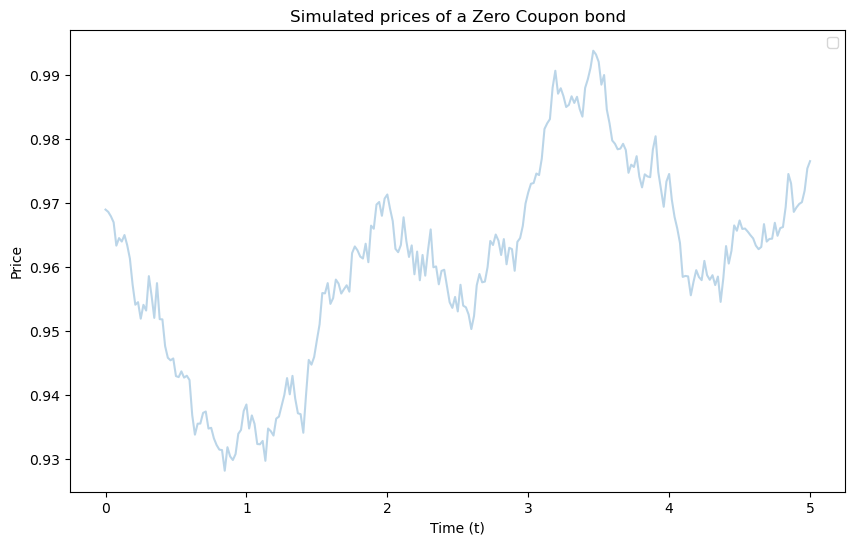

In [135]:
num_simulations = zero_bond_price.shape[0]


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :])

plt.xlabel('Time (t)')
plt.ylabel('Price')
plt.title('Simulated prices of a Zero Coupon bond')

plt.legend()
plt.show()

In [136]:
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=10)
horizon=5

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


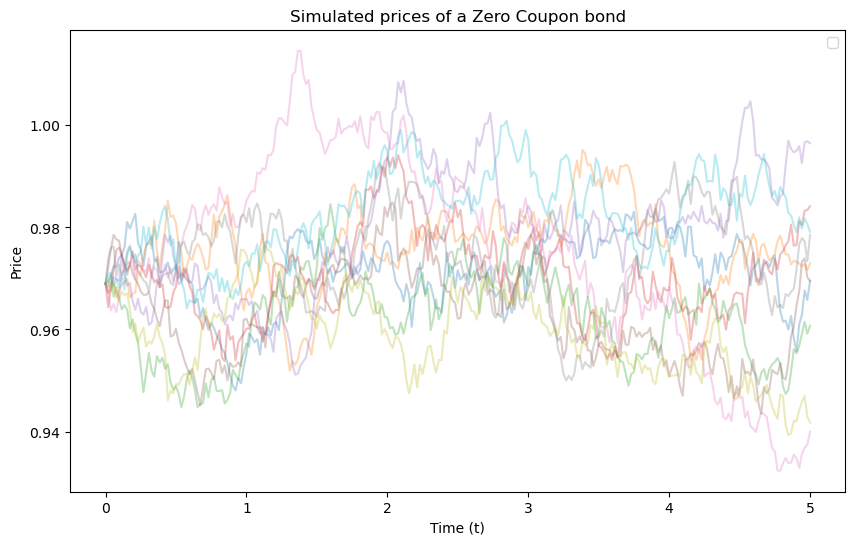

In [137]:
num_simulations = zero_bond_price.shape[0]


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :], alpha=0.3)

plt.xlabel('Time (t)')
plt.ylabel('Price')
plt.title('Simulated prices of a Zero Coupon bond')

plt.legend()
plt.show()

In [116]:
zero_bond_price

array([[0.96899172, 0.96499692, 0.96477529, 0.9587346 , 0.95970361,
        0.95990687, 0.95584387, 0.95979912, 0.95830246, 0.96226187,
        0.96795604, 0.96362891, 0.95575804, 0.95454789, 0.95180528,
        0.95412791, 0.95295712, 0.95375618, 0.95673664, 0.95447671,
        0.95489738, 0.95613041, 0.95315605, 0.95669215, 0.96170547,
        0.96316705, 0.96152007, 0.96021743, 0.96200732, 0.96521161,
        0.96806497, 0.97201422, 0.96915253, 0.97011132, 0.96898283,
        0.97290414, 0.97556351, 0.97646153, 0.97886033, 0.97688828,
        0.97343113, 0.97572302, 0.9766477 , 0.97661588, 0.973509  ,
        0.97357804, 0.96942591, 0.97149323, 0.96707358, 0.96194533,
        0.96465505, 0.96070416, 0.95816807, 0.95308383, 0.95463482,
        0.95837233, 0.96009148, 0.96318687, 0.95886816, 0.96238328,
        0.96196132, 0.96047321, 0.96285241, 0.95967295, 0.96125126,
        0.96201171, 0.9593605 , 0.95919339, 0.95538073, 0.95340661,
        0.95243525, 0.95423013, 0.95935638, 0.95

In [117]:
forward_libor_rate = fid.zcb_to_forward_LIBOR_rates(T, zcb_price, horizon=1)
df_forward_rate = pd.DataFrame({'T': T,'6M Forward EURIBOR rate':␣
↪forward_libor_rate})
df_forward_rate.set_index('T', inplace=True)
df_forward_rate

SyntaxError: invalid character '␣' (U+2423) (3284428423.py, line 2)

In [ ]:
alpha = 0.5
T_max = 6
idx_exer, idx_mat = 3, 11

K_swaption_offset = [-300,-250,-200,-150,-100,-50,0,50,100,150,200,250,300]

N_swaption = len(K_swaption_offset)

M = int(round(T_max/alpha)+1)

p= np.array([0.98322948,0.96455878,0.94449414,0.92344747,
            0.90175113,0.87967118,0.85741902,0.83516131,
            0.81302835,0.79112104,0.76951663,0.7482734])
price_market = np.array([0.0995524,0.08350629,0.06774531,
                    0.05248227,0.03808218,0.02519355,
                    0.01482874,0.00785645,0.00404525,
                    0.00219232,0.00128815,0.00081635,
                    0.00054773])
S_swap = 0
for i in range(idx_exer+1,idx_mat + 1):
    S_swap += alpha*p[i]
    R_swap = (p[idx_exer] - p[idx_mat])/S_swap
print('Forward par swap rate:',R_swap)

Forward par swap rate: 0.053115709145571254


In [ ]:
def zcb_price_vasicek(r0,a,b,sigma,tau):
    if type(tau) == int or type(tau) == float:
        B = (1/a)*(1-np.exp(-a*tau))
        A = (B-tau)*(a*b-0.5*sigma**2)/(a**2)-(sigma**2*B)/(4*a)
        p = np.exp(A-r0*B)
    elif type(tau) == tuple or type(tau) == list or type(tau) == np.ndarray:
        M = len(tau)
        p = np.zeros([M])
        for i in range(0,M):
            B = (1/a)*(1-np.exp(-a*tau[i]))
            A = (B-tau[i])*(a*b-0.5*sigma**2)/(a**2)-(sigma**2*B)/(4*a)
            p[i] = np.exp(A-r0*B)
    else:
        print(f"tau not a recognized type")
        p = False
    return p

In [ ]:
zcb_price_vasicek(0.2,0.05,0.2,0.2,10)

215.8746801263545

In [ ]:
#### TEST

In [ ]:
NumMaturities = 8
print(NumMaturities)

8


In [ ]:
CurrentForwardValues = np.array([0.0250,   0.0275,    0.0318 ,   0.0350  ,  0.0376  ,  0.0391   , 0.0408   , 0.0412])
print(CurrentForwardValues )

[0.025  0.0275 0.0318 0.035  0.0376 0.0391 0.0408 0.0412]


In [ ]:
ATMVolatilities = np.array([0.3410,    0.3650,    0.3780,    0.3660 ,   0.3500 ,   0.3190  ,  0.2810 ,   0.2660])
print(ATMVolatilities )

[0.341 0.365 0.378 0.366 0.35  0.319 0.281 0.266]


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Define the settle date and exercise dates
settle_date = datetime.strptime('12-Jun-2013', '%d-%b-%Y')
exercise_dates = pd.to_datetime(['12-Sep-2013', '12-Jun-2014', '12-Jun-2015', '12-Jun-2016', 
                                 '12-Jun-2017', '12-Jun-2018', '12-Jun-2020', '12-Jun-2023'])

# Calculate YearsToExercise
years_to_exercise = (exercise_dates - settle_date).days / 365.25

# Define market volatilities and market strikes
market_volatilities = np.array([
    [57.6, 53.7, 49.4, 45.6, 44.1, 41.1, 35.2, 32.0],
    [46.6, 46.9, 44.8, 41.6, 39.8, 37.4, 33.4, 31.0],
    [35.9, 39.3, 39.6, 37.9, 37.2, 34.7, 30.5, 28.9],
    [34.1, 36.5, 37.8, 36.6, 35.0, 31.9, 28.1, 26.6],
    [41.0, 41.3, 39.5, 37.8, 36.0, 32.6, 29.0, 26.0],
    [45.8, 43.4, 41.9, 39.2, 36.9, 33.2, 29.6, 26.3],
    [50.3, 46.9, 44.0, 40.0, 37.5, 33.8, 30.2, 27.3]
]) / 100  # Convert percentages to decimals

market_strikes = np.array([
    [1.00, 1.25, 1.68, 2.00, 2.26, 2.41, 2.58, 2.62],
    [1.50, 1.75, 2.18, 2.50, 2.76, 2.91, 3.08, 3.12],
    [2.00, 2.25, 2.68, 3.00, 3.26, 3.41, 3.58, 3.62],
    [2.50, 2.75, 3.18, 3.50, 3.76, 3.91, 4.08, 4.12],
    [3.00, 3.25, 3.68, 4.00, 4.26, 4.41, 4.58, 4.62],
    [3.50, 3.75, 4.18, 4.50, 4.76, 4.91, 5.08, 5.12],
    [4.00, 4.25, 4.68, 5.00, 5.26, 5.41, 5.58, 5.62]
]) / 100  # Convert strikes to decimals

# Extract the fourth row for Current Forward Values and ATM Volatilities
current_forward_values = market_strikes[3, :]
atm_volatilities = market_volatilities[3, :]

# Number of maturities
num_maturities = len(years_to_exercise)

# Example print out to check data
num_maturities, years_to_exercise, current_forward_values, atm_volatilities


(8,
 Float64Index([0.2518822724161533,  0.999315537303217,  1.998631074606434,
               3.0006844626967832,                4.0,  4.999315537303217,
                7.000684462696783,  9.998631074606434],
              dtype='float64'),
 array([0.025 , 0.0275, 0.0318, 0.035 , 0.0376, 0.0391, 0.0408, 0.0412]),
 array([0.341, 0.365, 0.378, 0.366, 0.35 , 0.319, 0.281, 0.266]))

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
from scipy.optimize import root

def blackvolbysabr(alpha, beta, rho, nu, F, K, T):
    """
    Placeholder for the SABR volatility model function. In practice, this should
    compute the Black volatility given the SABR model parameters.
    """
    # This function is a placeholder and does not perform actual computation.
    return np.sqrt((alpha**2) * (K**2) * T)  # Simplified placeholder

def sabr_root_function(T, F, beta, vol):
    """
    Generate the polynomial coefficients for the root finding based on the SABR model.
    """
    return [
        (1 - beta)**2 * T / 24 / F**(2 - 2*beta),
        0,  # This coefficient corresponds to a term not given, assumed zero for alignment
        (2 - 3*rho**2) * nu**2 * T / 24,
        -vol * F**(1 - beta)
    ]

def find_smallest_positive_root(coeffs):
    """
    Find the smallest positive real root of the polynomial defined by coeffs.
    """
    result = root(lambda x: np.polyval(coeffs[::-1], x), 0.5)  # Start at 0.5
    roots = result.x
    # Filter roots to find the smallest positive real root
    positive_real_roots = [r for r in roots if r > 0 and np.isreal(r)]
    return min(positive_real_roots) if positive_real_roots else None

def objective_function(X, beta, F, T, vol, MarketVolatilities, Settle, ExerciseDates, MarketStrikes, k):
    """
    Objective function to be minimized, comparing market volatilities to model volatilities.
    """
    rho, nu = X
    coeffs = sabr_root_function(T, F, beta, vol)
    alpha = find_smallest_positive_root(coeffs)
    theoretical_vols = blackvolbysabr(alpha, beta, rho, nu, Settle, ExerciseDates[k], F)
    return MarketVolatilities[:, k] - theoretical_vols

def calibrate_sabr_parameters_fixed(NumMaturities, YearsToExercise, CurrentForwardValues, ATMVolatilities, Settle, ExerciseDates, MarketStrikes, MarketVolatilities):
    """
    Calibrate SABR model parameters for a range of maturities with corrected verbose settings.
    """
    Beta = 0.5
    Betas = np.full(NumMaturities, Beta)
    Alphas = np.zeros(NumMaturities)
    Rhos = np.zeros(NumMaturities)
    Nus = np.zeros(NumMaturities)
    options = {'verbose': 0}  # Corrected for use with scipy.optimize.least_squares

    for k in range(NumMaturities):
        obj_fun = lambda X: objective_function(X, Beta, CurrentForwardValues[k], YearsToExercise[k], ATMVolatilities[k], MarketVolatilities, Settle, ExerciseDates, MarketStrikes, k)
        result = least_squares(obj_fun, [0, 0.5], bounds=([-1, 0], [1, np.inf]), **options)
        rho, nu = result.x
        # Re-evaluate to get alpha
        coeffs = sabr_root_function(YearsToExercise[k], CurrentForwardValues[k], Beta, ATMVolatilities[k])
        Alpha = find_smallest_positive_root(coeffs)
        
        Alphas[k] = Alpha
        Rhos[k] = rho
        Nus[k] = nu

    # Create a DataFrame for results
    parameters_df = pd.DataFrame({
        'Alpha': Alphas,
        'Beta': Betas,
        'Rho': Rhos,
        'Nu': Nus
    }, index=[f"{int(YearsToExercise[k] * 12)}M into 10Y" for k in range(NumMaturities)])
    return parameters_df

# Now the corrected function can be used with proper verbose settings.
# Example usage would be similar to previously discussed, with data properly prepared for the call.



In [ ]:
result = calibrate_sabr_parameters_fixed(
    num_maturities,
    years_to_exercise,
    current_forward_values,
    atm_volatilities,
    settle_date,  # Or the numeric equivalent if needed by the function
    exercise_dates,
    market_strikes,
    market_volatilities
)

print(result)


NameError: name 'rho' is not defined

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
from scipy.optimize import root

def blackvolbysabr(alpha, beta, rho, nu, F, K, T):
    """
    Computes the Black volatility given the SABR model parameters.
    This function should be replaced with the actual SABR volatility computation formula.
    """
    # This is a placeholder for demonstration and does not perform an actual SABR model calculation.
    return np.sqrt((alpha**2) * (K**2) * T)  # Simplified placeholder

def sabr_root_function(T, F, beta, vol):
    """
    Generate the polynomial coefficients for the root finding based on the SABR model.
    """
    return [
        (1 - beta)**2 * T / 24 / F**(2 - 2*beta),
        0,  # This coefficient corresponds to a term not given, assumed zero for alignment
        (2 - 3*rho**2) * nu**2 * T / 24,
        -vol * F**(1 - beta)
    ]

def find_smallest_positive_root(coeffs):
    """
    Find the smallest positive real root of the polynomial defined by coeffs.
    """
    result = root(lambda x: np.polyval(coeffs[::-1], x), 0.5)  # Start at 0.5
    roots = result.x
    # Filter roots to find the smallest positive real root
    positive_real_roots = [r for r in roots if r > 0 and np.isreal(r)]
    return min(positive_real_roots) if positive_real_roots else None

def objective_function(X, beta, F, T, vol, MarketVolatilities, Settle, ExerciseDates, MarketStrikes, k):
    """
    Objective function to be minimized, comparing market volatilities to model volatilities.
    """
    rho, nu = X
    coeffs = sabr_root_function(T, F, beta, vol)
    alpha = find_smallest_positive_root(coeffs)
    theoretical_vols = blackvolbysabr(alpha, beta, rho, nu, Settle, ExerciseDates[k], F)
    return MarketVolatilities[:, k] - theoretical_vols

def calibrate_sabr_parameters_fixed(NumMaturities, YearsToExercise, CurrentForwardValues, ATMVolatilities, Settle, ExerciseDates, MarketStrikes, MarketVolatilities):
    """
    Calibrate SABR model parameters for a range of maturities with corrected verbose settings.
    """
    Beta = 0.5
    Betas = np.full(NumMaturities, Beta)
    Alphas = np.zeros(NumMaturities)
    Rhos = np.zeros(NumMaturities)
    Nus = np.zeros(NumMaturities)
    options = {'verbose': 0}  # Corrected for use with scipy.optimize.least_squares

    for k in range(NumMaturities):
        obj_fun = lambda X: objective_function(X, Beta, CurrentForwardValues[k], YearsToExercise[k], ATMVolatilities[k], MarketVolatilities, Settle, ExerciseDates, MarketStrikes, k)
        result = least_squares(obj_fun, [0, 0.5], bounds=([-1, 0], [1, np.inf]), **options)
        rho, nu = result.x
        Rhos[k] = rho
        Nus[k] = nu
        # Re-evaluate to get alpha
        coeffs = sabr_root_function(YearsToExercise[k], CurrentForwardValues[k], Beta, ATMVolatilities[k])
        Alpha = find_smallest_positive_root(coeffs)
        Alphas[k] = Alpha

    # Create a DataFrame for results
    parameters_df = pd.DataFrame({
        'Alpha': Alphas,
        'Beta': Betas,
        'Rho': Rhos,
        'Nu': Nus
    }, index=[f"{int(YearsToExercise[k] * 12)}M into 10Y" for k in range(NumMaturities)])
    return parameters_df


In [ ]:
result = calibrate_sabr_parameters_fixed(
    num_maturities,
    years_to_exercise,
    current_forward_values,
    atm_volatilities,
    settle_date,  # Or the numeric equivalent if needed by the function
    exercise_dates,
    market_strikes,
    market_volatilities
)

print(result)
